

<h1 align="center"><font size="5">Predicting Iris flower Class</font></h1>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Load Data From CSV File  

In [2]:
df = pd.read_csv('E:\Datasets\Iris dataset.csv')   
df.head(100)

,Sepal length in cm,Sepal width in cm,Petal length in cm,Petal width in cm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [3]:
df.isnull()

,Sepal length in cm,Sepal width in cm,Petal length in cm,Petal width in cm,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [4]:
df.describe()

,Sepal length in cm,Sepal width in cm,Petal length in cm,Petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 5)

# Data visualization and pre-processing

Text(0.5, 1.0, 'scatter')

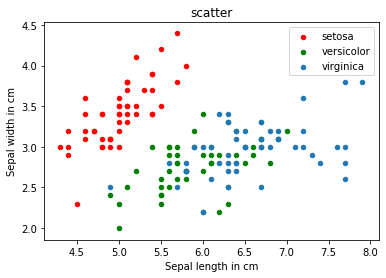

In [6]:
# scatter plot using pandas

ax = df[df.Class=='Iris-setosa'].plot.scatter(x='Sepal length in cm', y='Sepal width in cm', color='red', label='setosa')
df[df.Class=='Iris-versicolor'].plot.scatter(x='Sepal length in cm', y='Sepal width in cm', color='green', label='versicolor', ax=ax)
df[df.Class=='Iris-virginica'].plot.scatter(x='Sepal length in cm', y='Sepal width in cm', label='virginica', ax=ax)
ax.set_title("scatter")

# Pre-processing:  Feature selection/extraction

In [7]:
## Convert Categorical features to numerical values
di = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : '2'}
df['Class'] = df['Class'].apply(lambda x: di.get(x,x))

df.Class = df.Class.astype('int64')
df.Class

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int64

In [8]:
Feature = df[['Sepal length in cm','Sepal width in cm','Petal length in cm','Petal width in cm']]
Feature.head()

,Sepal length in cm,Sepal width in cm,Petal length in cm,Petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Feature selection

In [9]:
X = Feature
X[0:5]

,Sepal length in cm,Sepal width in cm,Petal length in cm,Petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y = df['Class']
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## Normalize Data 

In [11]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# Classification 

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Naive Bayes
- Random Forest

## Divide the dataset into Training and Test Set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

# K Nearest Neighbor(KNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 10
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_KNN=neigh.predict(X_test)
    print("The predicted values using K = ", n, "is ", yhat_KNN[0:5])

The predicted values using K =  1 is  [2 0 2 2 2]
The predicted values using K =  2 is  [2 0 2 2 2]
The predicted values using K =  3 is  [2 0 2 2 2]
The predicted values using K =  4 is  [2 0 2 2 2]
The predicted values using K =  5 is  [2 0 2 2 2]
The predicted values using K =  6 is  [2 0 2 2 2]
The predicted values using K =  7 is  [2 0 2 2 2]
The predicted values using K =  8 is  [2 0 2 2 2]
The predicted values using K =  9 is  [2 0 2 2 2]


# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree_criterions = ['entropy', 'gini']
for i in dtree_criterions:
    drugTree = DecisionTreeClassifier(criterion=i)
    drugTree.fit(X_train, y_train)
    predTree = drugTree.predict(X_test)
    print ("The values predicted by Decision Tree using criterion = ",i," is ", predTree [0:5])

The values predicted by Decision Tree using criterion =  entropy  is  [2 0 2 2 2]
The values predicted by Decision Tree using criterion =  gini  is  [2 0 2 2 2]


# Support Vector Machine

In [17]:
from sklearn import svm
svm_kernels = ['rbf', 'linear', 'poly', 'sigmoid']
for i in svm_kernels:
    clf = svm.SVC(kernel=i)
    clf.fit(X_train, y_train) 
    yhat_SVM = clf.predict(X_test)
    print("The values predicted by SVM using kernels = ", i, " is ", yhat_SVM [0:5])

The values predicted by SVM using kernels =  rbf  is  [2 0 2 2 2]
The values predicted by SVM using kernels =  linear  is  [2 0 2 2 2]
The values predicted by SVM using kernels =  poly  is  [2 0 2 2 2]
The values predicted by SVM using kernels =  sigmoid  is  [2 0 2 1 2]


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
c_param_range=[0.001,0.01,0.1]
lr_solvers=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
for i in lr_solvers:
    for f in c_param_range:
        LR = LogisticRegression(C=f, solver=i).fit(X_train,y_train)
        yhat_LR = LR.predict(X_test)
        print("The values predicted by Logistic Regression using c = ",f," and solver = ",i, " is ",yhat_LR[0:5])


The values predicted by Logistic Regression using c =  0.001  and solver =  liblinear  is  [2 0 2 2 2]
The values predicted by Logistic Regression using c =  0.01  and solver =  liblinear  is  [2 0 2 2 2]
The values predicted by Logistic Regression using c =  0.1  and solver =  liblinear  is  [2 0 2 2 2]
The values predicted by Logistic Regression using c =  0.001  and solver =  newton-cg  is  [1 1 1 2 1]
The values predicted by Logistic Regression using c =  0.01  and solver =  newton-cg  is  [2 0 2 2 2]
The values predicted by Logistic Regression using c =  0.1  and solver =  newton-cg  is  [2 0 2 2 2]
The values predicted by Logistic Regression using c =  0.001  and solver =  lbfgs  is  [1 1 1 2 1]
The values predicted by Logistic Regression using c =  0.01  and solver =  lbfgs  is  [2 0 2 2 2]
The values predicted by Logistic Regression using c =  0.1  and solver =  lbfgs  is  [2 0 2 2 2]
The values predicted by Logistic Regression using c =  0.001  and solver =  sag  is  [1 1 1 2 

# Naive bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_NB = gnb.fit(X_train, y_train).predict(X_test)
print("The values predicted by Naive Bayes is ", y_pred_NB[0:5])

The values predicted by Naive Bayes is  [2 0 2 2 2]


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_criterion=['entropy', 'gini']
for i in rf_criterion:
    clf=RandomForestClassifier(criterion=i)
    clf.fit(X_train,y_train)
    y_pred_RF=clf.predict(X_test)
    print("The values predicted by Random Forest using criterion = ", i," is ",y_pred_RF[0:5])


The values predicted by Random Forest using criterion =  entropy  is  [2 0 2 2 2]
The values predicted by Random Forest using criterion =  gini  is  [2 0 2 2 2]


# Model Evaluation using Test set

In [21]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### KNN

In [22]:
Ks = 10
accuracy_scor = np.zeros((Ks-1))
f1_scor = np.zeros((Ks-1))


for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_KNN=neigh.predict(X_test)
    accuracy_scor[n-1] = accuracy_score(y_test, yhat_KNN)
    f1_scor[n-1] = f1_score(y_test, yhat_KNN, average = 'weighted')
    print("The accuracy score with k = ",n, "is ",accuracy_scor[n-1])
    print("The f1 score with k = ",n, "is ",f1_scor[n-1])
    

print( "\nThe best accuracy score for KNN was ", accuracy_scor.max(), "with k=", accuracy_scor.argmax()+1) 
print( "The best f1 score for KNN was ", f1_scor.max(), "with k=", f1_scor.argmax()+1) 

The accuracy score with k =  1 is  0.9333333333333333
The f1 score with k =  1 is  0.9327283726557775
The accuracy score with k =  2 is  0.9555555555555556
The f1 score with k =  2 is  0.9555555555555556
The accuracy score with k =  3 is  0.9555555555555556
The f1 score with k =  3 is  0.9555555555555556
The accuracy score with k =  4 is  0.9555555555555556
The f1 score with k =  4 is  0.9555555555555556
The accuracy score with k =  5 is  0.9555555555555556
The f1 score with k =  5 is  0.9555555555555556
The accuracy score with k =  6 is  0.9555555555555556
The f1 score with k =  6 is  0.9555555555555556
The accuracy score with k =  7 is  0.9555555555555556
The f1 score with k =  7 is  0.9555555555555556
The accuracy score with k =  8 is  0.9555555555555556
The f1 score with k =  8 is  0.9555555555555556
The accuracy score with k =  9 is  0.9555555555555556
The f1 score with k =  9 is  0.9555555555555556

The best accuracy score for KNN was  0.9555555555555556 with k= 2
The best f1 sco

#### Classification Report of KNN

In [23]:
neigh = KNeighborsClassifier(n_neighbors = accuracy_scor.argmax()+1).fit(X_train,y_train)
yhat_KNN=neigh.predict(X_test)
print (classification_report(y_test, yhat_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45



### Decision tree

In [24]:
f = 0
ascore_dtree = np.zeros(2)
fscore_dtree = np.zeros(2)
dtree_criterions = ['entropy', 'gini']
for i in dtree_criterions:
    drugTree = DecisionTreeClassifier(criterion=i)
    drugTree.fit(X_train, y_train)
    predTree = drugTree.predict(X_test)
    ascore_dtree[f] = accuracy_score(y_test, predTree)
    fscore_dtree[f] = f1_score(y_test, predTree, average = 'weighted')
    print("DecisionTrees's Accuracy with criterion = ", i," using Accuracy Score: ", accuracy_score(y_test, predTree))
    print("DecisionTrees's Accuracy with criterion = ", i," using F1 Score: ", f1_score(y_test, predTree, average = 'weighted'))
    f += 1
print("\nThe best accuracy score using Decision Tree is ",ascore_dtree.max())
print("The best f1 score using Decision Tree is ",fscore_dtree.max())

DecisionTrees's Accuracy with criterion =  entropy  using Accuracy Score:  0.9777777777777777
DecisionTrees's Accuracy with criterion =  entropy  using F1 Score:  0.9775761242185925
DecisionTrees's Accuracy with criterion =  gini  using Accuracy Score:  0.9777777777777777
DecisionTrees's Accuracy with criterion =  gini  using F1 Score:  0.9775761242185925

The best accuracy score using Decision Tree is  0.9777777777777777
The best f1 score using Decision Tree is  0.9775761242185925


#### Classification Report of Decision Tree

In [25]:
k = ['entropy','gini']
for i in k:
    drugTree = DecisionTreeClassifier(criterion=i)
    drugTree.fit(X_train, y_train)
    predTree = drugTree.predict(X_test)
    print("Classification report for criterion = ",i,"\n\n",classification_report(y_test, predTree))


Classification report for criterion =  entropy 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Classification report for criterion =  gini 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



### Support Vector Machine

In [26]:
f=0
ascore_svm = np.zeros(4)
fscore_svm = np.zeros(4)
svm_kernels = ['rbf', 'linear', 'poly', 'sigmoid']

for i in svm_kernels:
    clf = svm.SVC(kernel=i)
    clf.fit(X_train, y_train) 
    yhat_SVM = clf.predict(X_test)
    ascore_svm[f] = accuracy_score(y_test, yhat_SVM)
    fscore_svm[f] = f1_score(y_test, yhat_SVM, average='weighted')
    print("The accuracy score for SVM with kernel = ", i," is : ", accuracy_score(y_test, yhat_SVM))
    print("The f1 score for SVM with kernel = ", i," is: ", f1_score(y_test, yhat_SVM, average='weighted'))
    f += 1
print("\nThe best accuracy score using SVM is ",ascore_svm.max())
print("The best f1 score using SVM is ",fscore_svm.max())    

The accuracy score for SVM with kernel =  rbf  is :  0.9555555555555556
The f1 score for SVM with kernel =  rbf  is:  0.9555555555555556
The accuracy score for SVM with kernel =  linear  is :  0.9555555555555556
The f1 score for SVM with kernel =  linear  is:  0.9555555555555556
The accuracy score for SVM with kernel =  poly  is :  0.9777777777777777
The f1 score for SVM with kernel =  poly  is:  0.9778953556731335
The accuracy score for SVM with kernel =  sigmoid  is :  0.8888888888888888
The f1 score for SVM with kernel =  sigmoid  is:  0.8912633888243644

The best accuracy score using SVM is  0.9777777777777777
The best f1 score using SVM is  0.9778953556731335


#### Classification Report of SVM

In [27]:
k = ['rbf', 'linear', 'poly', 'sigmoid']
for i in k:
    clf = svm.SVC(kernel=i)
    clf.fit(X_train, y_train) 
    yhat_SVM = clf.predict(X_test)
    print ("Classification report for kernel = ",i," \n\n",classification_report(y_test, yhat_SVM))

Classification report for kernel =  rbf  

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45

Classification report for kernel =  linear  

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45

Classification report for kernel =  poly  

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    

### Logistic Regression

In [28]:
g = 0
ascore_lr = np.zeros(15)
fscore_lr = np.zeros(15)
c_param_range=[0.001,0.01,0.1]
lr_solvers=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
for i in lr_solvers:
    for f in c_param_range:
        LR = LogisticRegression(C=f, solver=i).fit(X_train,y_train)
        yhat_LR = LR.predict(X_test)
        ascore_lr[g] = accuracy_score(y_test, yhat_LR)
        fscore_lr[g] = f1_score(y_test, yhat_LR, average='weighted')
        print("The accuracy score for Logistic Regression with solver = ", f, " and kernel = ", i," is : ", accuracy_score(y_test, yhat_LR))
        print("The f1 score for Logistic Regression with solver = ", f, " and kernel = ", i," is : ", f1_score(y_test, yhat_LR, average='weighted'))
        g += 1
print("\nThe best accuracy score using Logistic Regression is ",ascore_lr.max())
print("The best f1 score using Logistic Regression is ",fscore_lr.max())              

The accuracy score for Logistic Regression with solver =  0.001  and kernel =  liblinear  is :  0.8666666666666667
The f1 score for Logistic Regression with solver =  0.001  and kernel =  liblinear  is :  0.8498599439775911
The accuracy score for Logistic Regression with solver =  0.01  and kernel =  liblinear  is :  0.8666666666666667
The f1 score for Logistic Regression with solver =  0.01  and kernel =  liblinear  is :  0.8498599439775911
The accuracy score for Logistic Regression with solver =  0.1  and kernel =  liblinear  is :  0.8666666666666667
The f1 score for Logistic Regression with solver =  0.1  and kernel =  liblinear  is :  0.8683113727689001
The accuracy score for Logistic Regression with solver =  0.001  and kernel =  newton-cg  is :  0.28888888888888886
The f1 score for Logistic Regression with solver =  0.001  and kernel =  newton-cg  is :  0.19527400703871295
The accuracy score for Logistic Regression with solver =  0.01  and kernel =  newton-cg  is :  0.84444444444

#### Classification Report of Logistic Regression

In [29]:
k = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'sag']
for i in k:
    LR = LogisticRegression(C=0.01, solver=i).fit(X_train,y_train)
    yhat_LR = LR.predict(X_test)
    print("Classification report for solver = ",i," \n\n",classification_report(y_test, yhat_LR))

Classification report for solver =  liblinear  

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.40      0.57        10
           2       0.70      1.00      0.82        14

    accuracy                           0.87        45
   macro avg       0.90      0.80      0.80        45
weighted avg       0.91      0.87      0.85        45

Classification report for solver =  newton-cg  

               precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.62      0.80      0.70        10
           2       0.83      0.71      0.77        14

    accuracy                           0.84        45
   macro avg       0.82      0.82      0.81        45
weighted avg       0.86      0.84      0.85        45

Classification report for solver =  lbfgs  

               precision    recall  f1-score   support

           0       1.00      0.95    

### Naive Bayes

In [30]:
gnb = GaussianNB()
y_pred_NB = gnb.fit(X_train, y_train).predict(X_test)
print("The accuracy score for Naive Bayes is : ", accuracy_score(y_test, y_pred_NB))
print("The f1 score for Naive Bayes is: ", f1_score(y_test, y_pred_NB, average='weighted'))

The accuracy score for Naive Bayes is :  0.9777777777777777
The f1 score for Naive Bayes is:  0.9778953556731335


#### Classification report of Naive Bayes

In [31]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



## Random Forest

In [32]:
f=0
ascore_rf = np.zeros(2)
fscore_rf = np.zeros(2)
rf_criterion=['entropy', 'gini']
for i in rf_criterion:
    clf=RandomForestClassifier(criterion=i)
    clf.fit(X_train,y_train)
    y_pred_RF=clf.predict(X_test)
    ascore_rf[f] = accuracy_score(y_test, y_pred_RF)
    fscore_rf[f] = f1_score(y_test, y_pred_RF, average='weighted')
    print("The accuracy score for Random Forest with criterion = ",i," is ", accuracy_score(y_test, y_pred_RF))
    print("The f1 score for Random Forest with criterion = ",i," is ", f1_score(y_test, y_pred_RF, average='weighted'))
    f += 1
    
print("\nThe best accuracy score using Random Forest is ",ascore_rf.max())
print("The best f1 score using Random Forest is ",fscore_rf.max())    

The accuracy score for Random Forest with criterion =  entropy  is  0.9777777777777777
The f1 score for Random Forest with criterion =  entropy  is  0.9775761242185925
The accuracy score for Random Forest with criterion =  gini  is  0.9777777777777777
The f1 score for Random Forest with criterion =  gini  is  0.9775761242185925

The best accuracy score using Random Forest is  0.9777777777777777
The best f1 score using Random Forest is  0.9775761242185925


#### Classification report of Random Forest

In [33]:
k = ['entropy', 'gini']
for i in k:
    clf=RandomForestClassifier(criterion=i)
    clf.fit(X_train,y_train)
    y_pred_RF=clf.predict(X_test)
    print("Classification report for criterion = ",i," \n\n",classification_report(y_test, y_pred_RF))


Classification report for criterion =  entropy  

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Classification report for criterion =  gini  

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



# Report on accuracy of different algorithms using F1 score and Accuracy Score

In [34]:
# js = jaccard score.......fs = F1-Score
# KNN
knnas = accuracy_scor.max()
knnfs = f1_scor.max()
# DTree with max accuracy
dtreeas = ascore_dtree.max()
dtreefs = fscore_dtree.max()

# SVM with max accuracy
svmas = ascore_svm.max()
svmfs = fscore_svm.max()

# Logistic regression with max accuracy
lras = ascore_lr.max()
lrfs = fscore_lr.max()

# Naive Bayes
nbas = accuracy_score(y_test, y_pred_NB)
nbfs = f1_score(y_test, y_pred_NB, average='weighted')

# Random Forest
rfas = ascore_rf.max()
rffs = fscore_rf.max()

#max of all
max_as = [knnas,dtreeas,svmas,lras,nbas,rfas]
max_fs = [knnfs,dtreefs,svmfs,lrfs,nbfs,rffs]

## Final Report

In [35]:
data = {'Algorithm':['K-Nearest Neighor', 'Decision tree', 'Support Vector Machine', 'Logistic regression', 'Naive Bayes', 'Random Forest'], 
        'Accuracy_Score':max_as, 'F1-Score':max_fs}
s = pd.DataFrame(data, index = [1,2,3,4,5,6])
s

,Algorithm,Accuracy_Score,F1-Score
1,K-Nearest Neighor,0.955556,0.955556
2,Decision tree,0.977778,0.977576
3,Support Vector Machine,0.977778,0.977895
4,Logistic regression,0.955556,0.956893
5,Naive Bayes,0.977778,0.977895
6,Random Forest,0.977778,0.977576
